In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [2]:
model = YOLO('model.pt')

In [15]:
def evaluate_model(yaml):
    results = model.val(data=yaml)
    map_50 = results.results_dict['metrics/mAP50(B)']
    return map_50

In [20]:
map_50_luz = evaluate_model('/media/mateus/usarLinux/video/luz/data.yaml')
print(f"mAP@0.5: {map_50_luz}")

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.2.2+cu121 CPU (Intel Core(TM) i3-10100F 3.60GHz)


val: Scanning /media/mateus/usarLinux/video/luz/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 2400.59it/s]

val: New cache created: /media/mateus/usarLinux/video/luz/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 37. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


                   all         25         37      0.839      0.876      0.926      0.648
                person         25         27      0.869      0.852       0.92      0.615
                  door         25         10      0.809        0.9      0.932      0.682
Speed: 2.2ms preprocess, 96.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
mAP@0.5: 0.9259822814282186


In [17]:
map_50_escuro = evaluate_model('/media/mateus/usarLinux/video/escuro/data.yaml')
print(f"mAP@0.5: {map_50_escuro}")

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.2.2+cu121 CPU (Intel Core(TM) i3-10100F 3.60GHz)


val: Scanning /media/mateus/usarLinux/video/escuro/val/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 57. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


                   all         21         57      0.671       0.56      0.665      0.467
                person         21         52      0.785      0.519      0.719      0.531
                  door         21          5      0.556        0.6      0.612      0.404
Speed: 2.1ms preprocess, 94.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
mAP@0.5: 0.6653779180721406


In [18]:
map_50_distante = evaluate_model('/media/mateus/usarLinux/video/distante/data.yaml')
print(f"mAP@0.5: {map_50_distante}")

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.2.2+cu121 CPU (Intel Core(TM) i3-10100F 3.60GHz)


val: Scanning /media/mateus/usarLinux/video/distante/val/labels.cache... 23 images, 4 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


                   all         23         52       0.65       0.68      0.701      0.361
                person         23         49      0.833      0.694      0.862      0.578
                  door         23          3      0.468      0.667       0.54      0.145
Speed: 1.9ms preprocess, 71.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
mAP@0.5: 0.7006033208384812


In [19]:
map_50_perto = evaluate_model('/media/mateus/usarLinux/video/perto/data.yaml')
print(f"mAP@0.5: {map_50_perto}")

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.2.2+cu121 CPU (Intel Core(TM) i3-10100F 3.60GHz)


val: Scanning /media/mateus/usarLinux/video/perto/val/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 32. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


                   all         23         32      0.867      0.882      0.924      0.657
                person         23         22      0.926      0.864      0.927      0.637
                  door         23         10      0.808        0.9      0.921      0.676
Speed: 1.7ms preprocess, 83.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
mAP@0.5: 0.9243326885671908


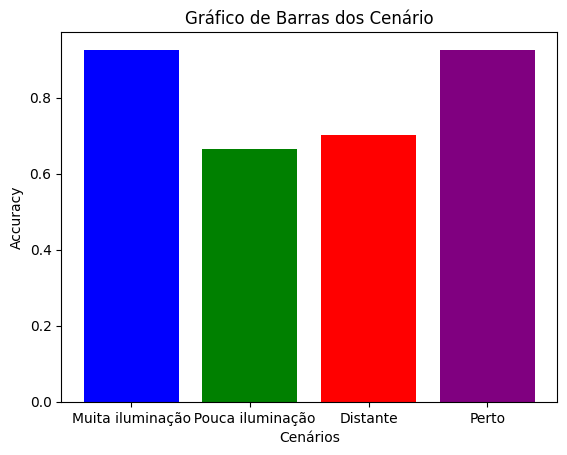

In [26]:
%matplotlib inline
plt.bar(['Muita iluminação', '  Pouca iluminação', 'Distante', 'Perto'], 
        [map_50_luz, map_50_escuro, map_50_distante, map_50_perto], 
        color=['blue', 'green', 'red', 'purple'])

# Adicionar título e rótulos
plt.title('Gráfico de Barras dos Cenário')
plt.xlabel('Cenários')
plt.ylabel('Accuracy')

# Mostrar o gráfico
plt.show()